<a href="https://colab.research.google.com/github/diyapancholi/Apple-Stock-Analysis/blob/master/Stock_Analysis_using_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
stock_data = '/content/AAPL.csv'

In [ ]:
df = pd.read_csv(stock_data)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10836 entries, 0 to 10835
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10836 non-null  object 
 1   Open       10836 non-null  float64
 2   High       10836 non-null  float64
 3   Low        10836 non-null  float64
 4   Close      10836 non-null  float64
 5   Adj Close  10836 non-null  float64
 6   Volume     10836 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 592.7+ KB


In [ ]:
print(df.head())

         Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.099319  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094137  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087228  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089387   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091978   73449600


In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099319,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094137,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087228,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089387,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091978,73449600
...,...,...,...,...,...,...,...
10831,2023-11-29,190.899994,192.089996,188.970001,189.369995,189.369995,43014200
10832,2023-11-30,189.839996,190.320007,188.190002,189.949997,189.949997,48794400
10833,2023-12-01,190.330002,191.559998,189.229996,191.240005,191.240005,45679300
10834,2023-12-04,189.979996,190.050003,187.449997,189.429993,189.429993,43389500


In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
df = df[['Date', 'Close']]

In [ ]:
df

,Date,Close
0,1980-12-12,0.128348
1,1980-12-15,0.121652
2,1980-12-16,0.112723
3,1980-12-17,0.115513
4,1980-12-18,0.118862
...,...,...
10831,2023-11-29,189.369995
10832,2023-11-30,189.949997
10833,2023-12-01,191.240005
10834,2023-12-04,189.429993


In [ ]:
df['Date']

,Date
0,1980-12-12
1,1980-12-15
2,1980-12-16
3,1980-12-17
4,1980-12-18
...,...
10831,2023-11-29
10832,2023-11-30
10833,2023-12-01
10834,2023-12-04


In [ ]:
import datetime
def str_to_datetime(s):
  split = s.split('-')
  year,month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

  datetime_object = str_to_datetime('1980-12-12')
  datetime_object
  datetime.datetime(1980,12,12,0,0)


In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)

In [ ]:
df['Date']

,Date
0,1980-12-12
1,1980-12-15
2,1980-12-16
3,1980-12-17
4,1980-12-18
...,...
10831,2023-11-29
10832,2023-11-30
10833,2023-12-01
10834,2023-12-04


In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862
...,...
2023-11-29,189.369995
2023-11-30,189.949997
2023-12-01,191.240005


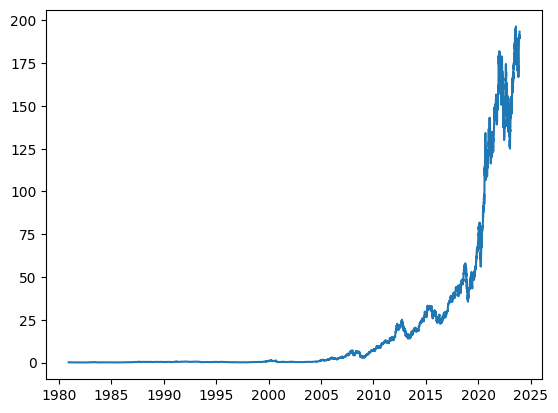

In [ ]:
plt.plot(df.index, df['Close'])

In [ ]:
!pip install pmdarima
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.6 MB/s eta 0:00:00


In [ ]:
filtered_data = df.loc['2015-01-01':'2023-12-05']

df = filtered_data
df

,Close
Date,
2015-01-02,27.332500
2015-01-05,26.562500
2015-01-06,26.565001
2015-01-07,26.937500
2015-01-08,27.972500
...,...
2023-11-29,189.369995
2023-11-30,189.949997
2023-12-01,191.240005


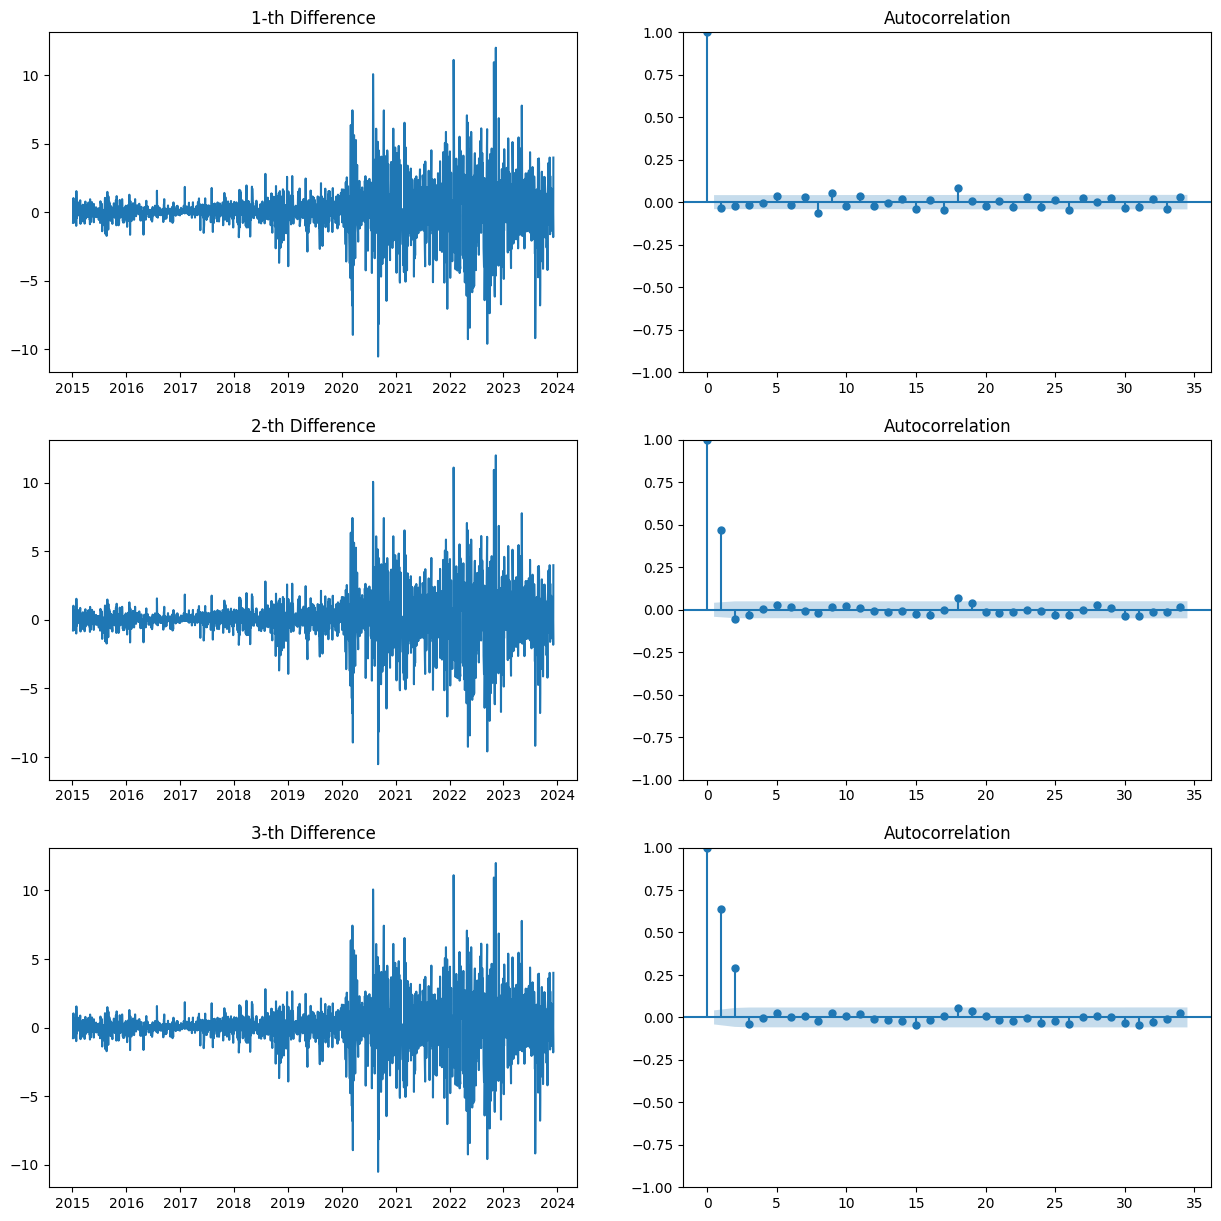

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams['figure.figsize'] = (15,15)
fig, ax = plt.subplots(3,2)
for i in range(3):
    ax[i,0].plot(df.diff())
    ax[i,0].set_title(f'{i+1}-th Difference')
    plot_acf(df.diff(periods=i+1).dropna(), ax=ax[i,1])

In [ ]:
for i in range(3):
    result = adfuller(df.diff(i+1).dropna())
    print(f'\nFor {i+1}-th diffrence we have the following \nTest Statistics : {result[0]} \np-value : {result[1]}')



For 1-th diffrence we have the following 
Test Statistics : -10.854646840098637 
p-value : 1.498336236015437e-19

For 2-th diffrence we have the following 
Test Statistics : -8.783086473443223 
p-value : 2.347808272130626e-14

For 3-th diffrence we have the following 
Test Statistics : -9.002934373089877 
p-value : 6.424449090627847e-15


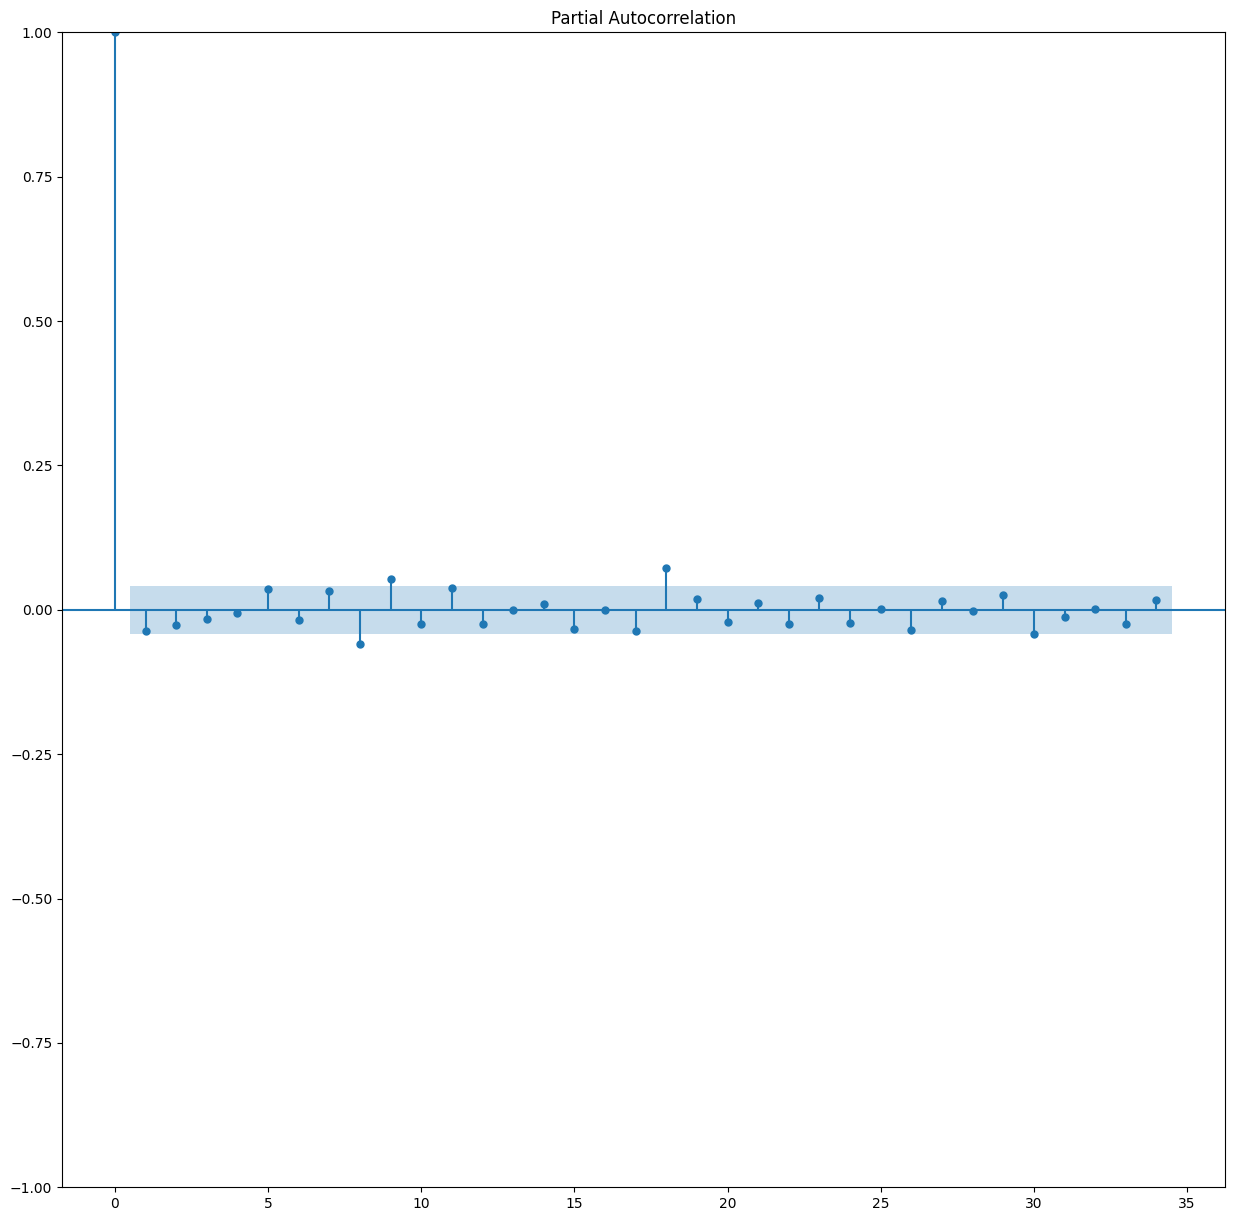

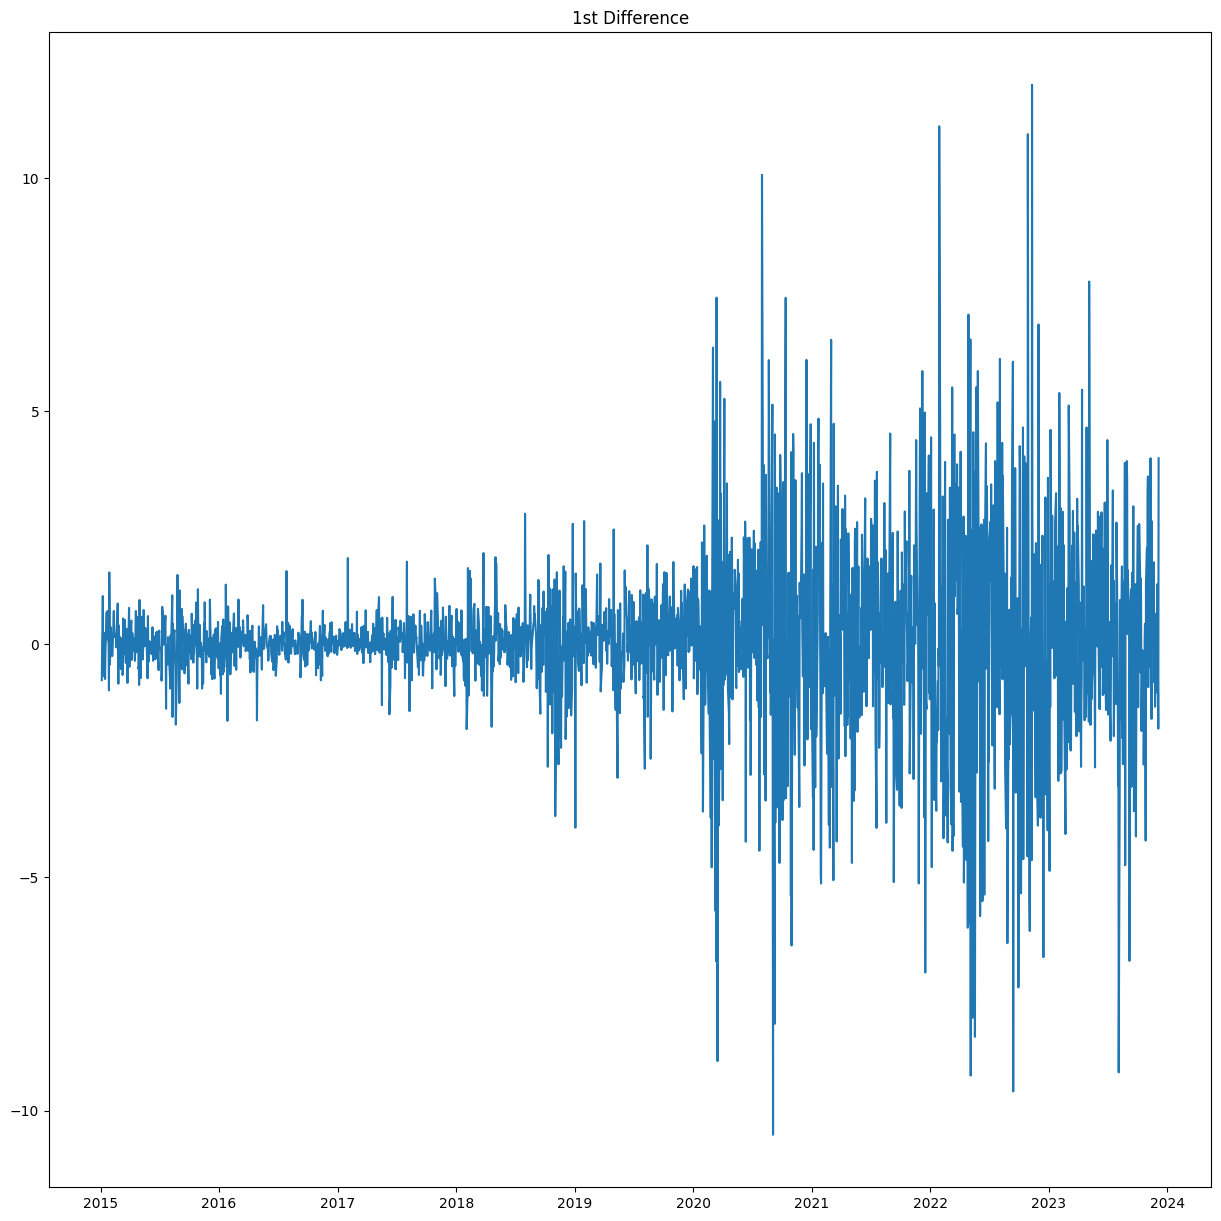

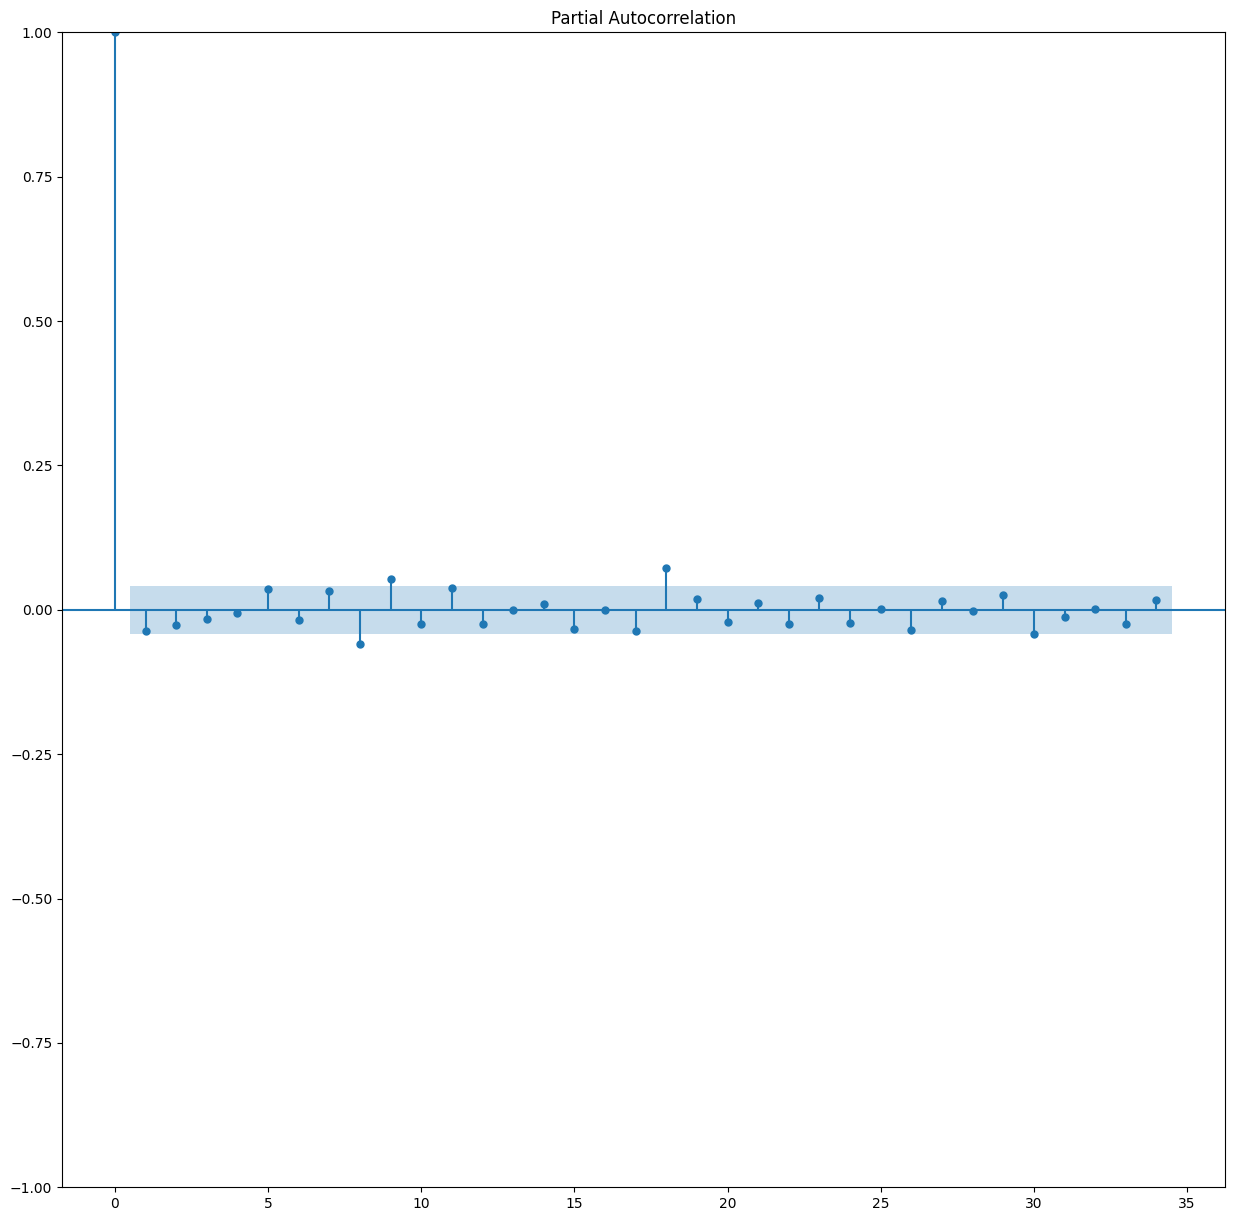

In [ ]:
plt.plot(df.diff())
plt.title(f'1st Difference')
plot_pacf(df.diff().dropna())


In [ ]:
model_arima = ARIMA(df, order=(1,1,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2247
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4538.526
Date:                Tue, 10 Sep 2024   AIC                           9083.052
Time:                        18:31:52   BIC                           9100.203
Sample:                             0   HQIC                          9089.313
                               - 2247                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4132      0.249      1.660      0.097      -0.075       0.901
ma.L1         -0.4525      0.245     -1.844      0.065      -0.934       0.029
sigma2         3.3319      0.050     66.665      0.0

<Axes: ylabel='Density'>

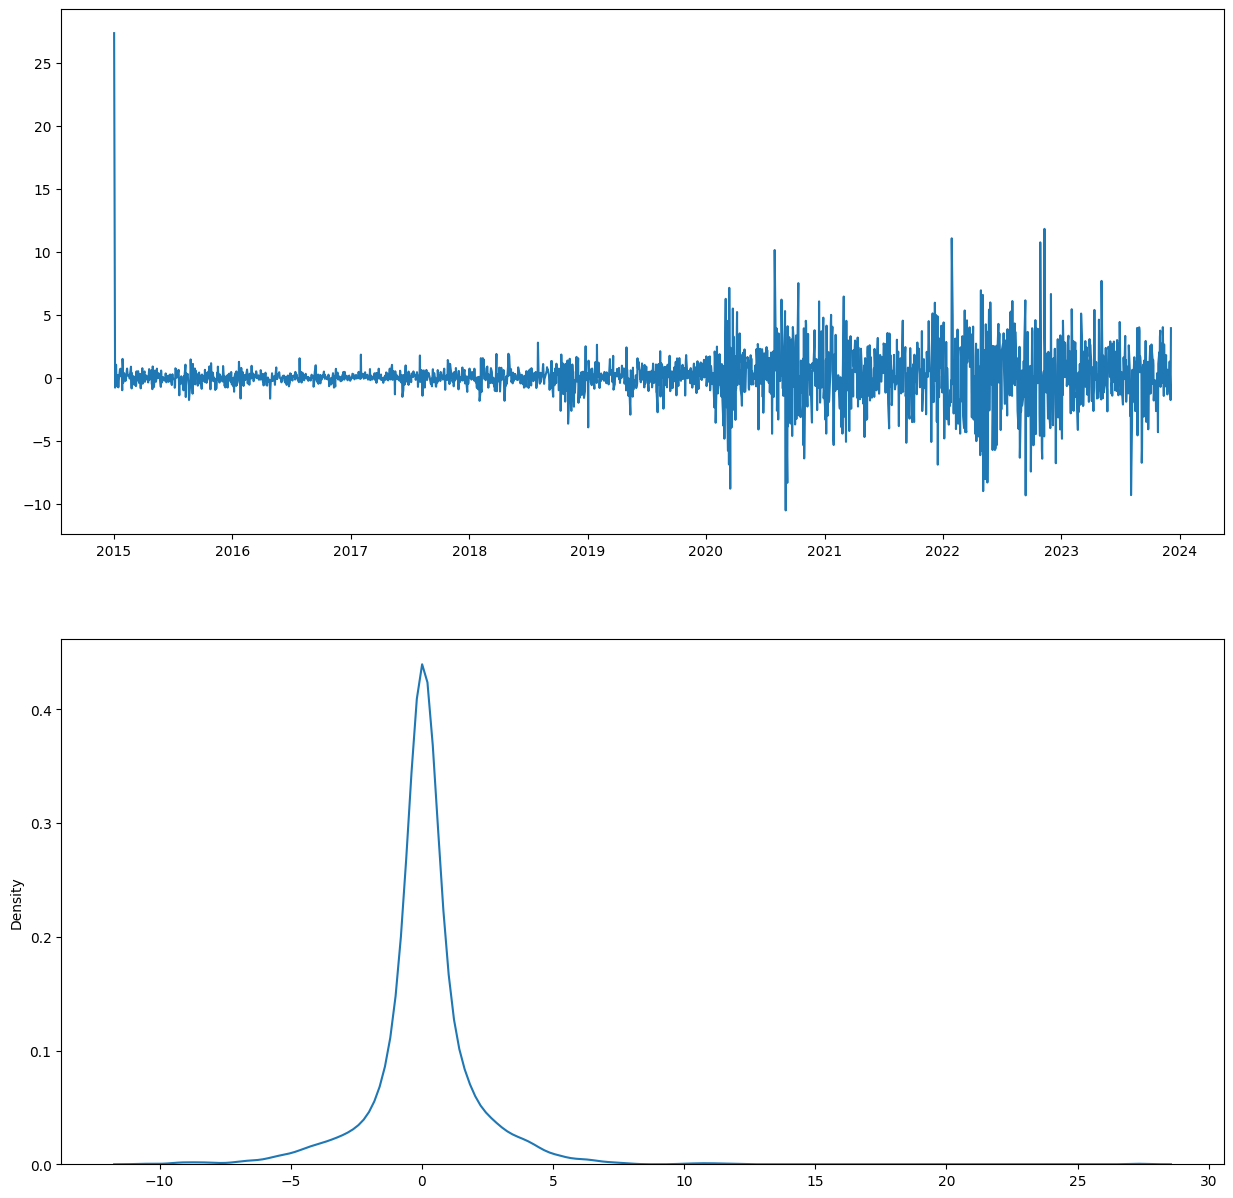

In [ ]:
import seaborn as sns
plt.subplot(211)
plt.plot(model_arima_fit.resid)
plt.subplot(212)
sns.kdeplot(model_arima_fit.resid)

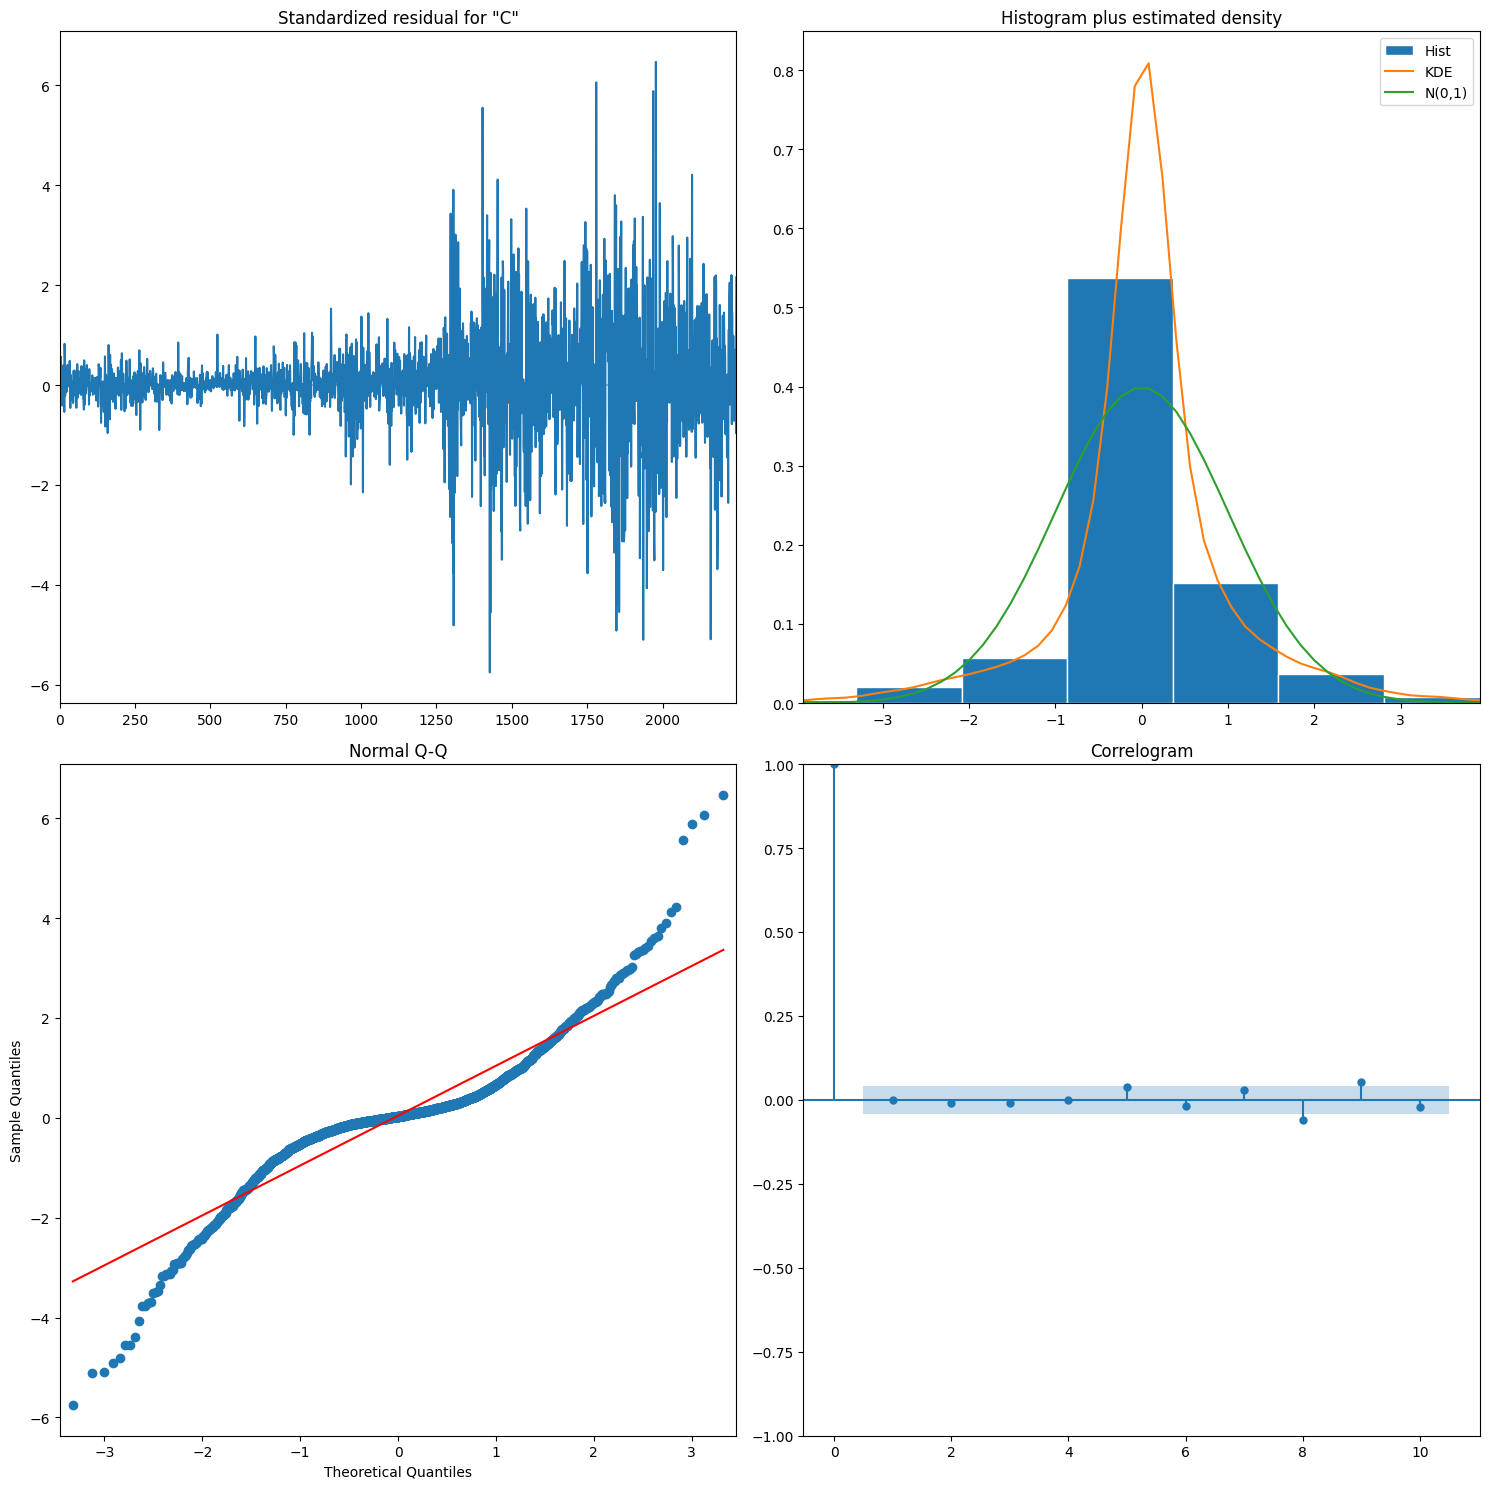

In [ ]:
model_arima_fit.plot_diagnostics()
plt.tight_layout()

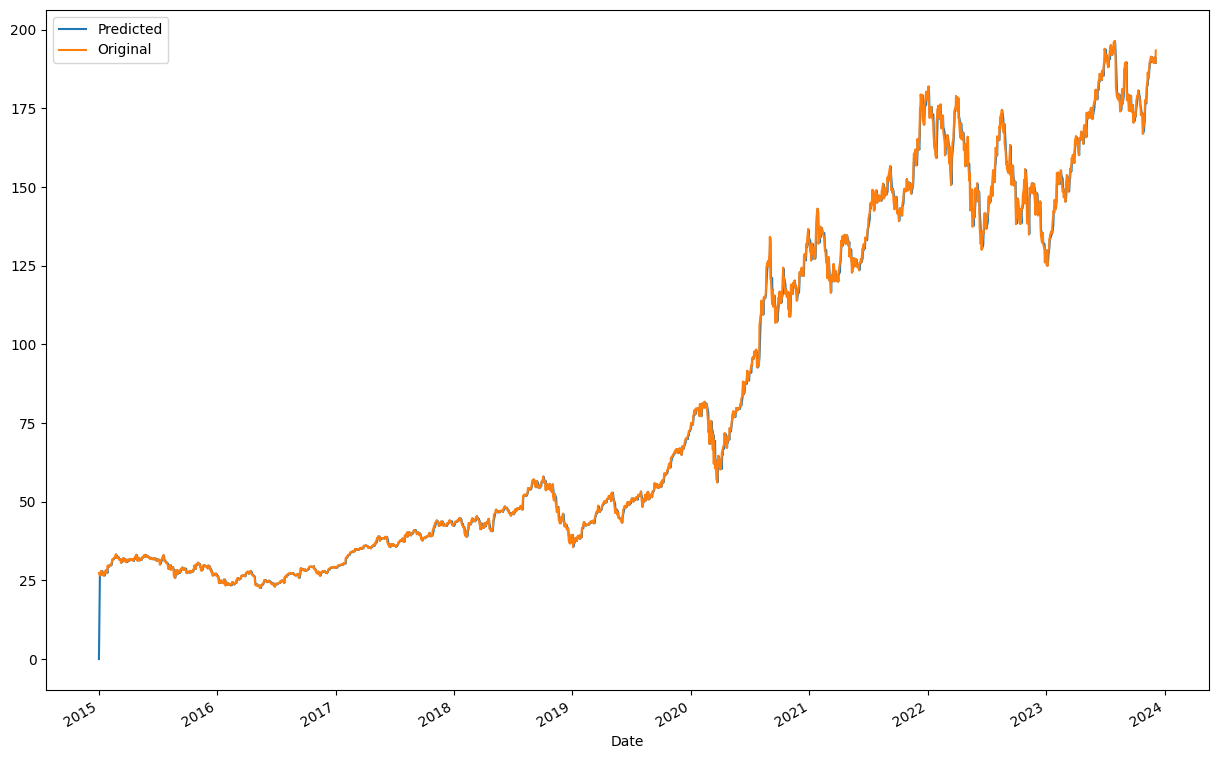

In [ ]:
plt.figure(figsize=(15,10))
model_arima_fit.predict(dynamic=False).plot(label='Predicted')
df['Close'].plot(label='Original')
plt.legend()

In [ ]:
train_size = int(len(df)*.89)
train, test = df[:train_size], df[train_size:]

In [ ]:
model_arima = ARIMA(train, order=(2,1,4))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1999
Model:                 ARIMA(2, 1, 4)   Log Likelihood               -3951.732
Date:                Tue, 10 Sep 2024   AIC                           7917.464
Time:                        18:32:09   BIC                           7956.664
Sample:                             0   HQIC                          7931.858
                               - 1999                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8529      0.009   -201.350      0.000      -1.871      -1.835
ar.L2         -0.9730      0.009   -107.160      0.000      -0.991      -0.955
ma.L1          1.8084      0.016    113.646      0.0

In [ ]:
fc = pd.Series(model_arima_fit.forecast(len(test)))
fc.index = test.index
fc

,predicted_mean
Date,
2022-12-09,143.292865
2022-12-12,142.823925
2022-12-13,142.956498
2022-12-14,143.052157
2022-12-15,142.745910
...,...
2023-11-29,142.952390
2023-11-30,142.947391
2023-12-01,142.944030


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate R² score
r2 = r2_score(test, fc)
mae = mean_absolute_error(test, fc)
rmse = np.sqrt(mean_squared_error(test, fc))
mape = np.mean(np.abs((test['Close'] - fc) / test['Close'])) * 100


# Display the R²
print(f'Mean Absolute Error (MAE): {mae:.3f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.3f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.3f}%')
print(f'R² Score: {r2:.2f}')

Mean Absolute Error (MAE): 27.996
Root Mean Squared Error (RMSE): 31.717
Mean Absolute Percentage Error (MAPE): 15.851%
R² Score: -1.96


In [ ]:
print(train)

                 Close
Date                  
2015-01-02   27.332500
2015-01-05   26.562500
2015-01-06   26.565001
2015-01-07   26.937500
2015-01-08   27.972500
...                ...
2022-12-02  147.809998
2022-12-05  146.630005
2022-12-06  142.910004
2022-12-07  140.940002
2022-12-08  142.649994

[1999 rows x 1 columns]


In [ ]:
print(test)

                 Close
Date                  
2022-12-09  142.160004
2022-12-12  144.490005
2022-12-13  145.470001
2022-12-14  143.210007
2022-12-15  136.500000
...                ...
2023-11-29  189.369995
2023-11-30  189.949997
2023-12-01  191.240005
2023-12-04  189.429993
2023-12-05  193.419998

[248 rows x 1 columns]


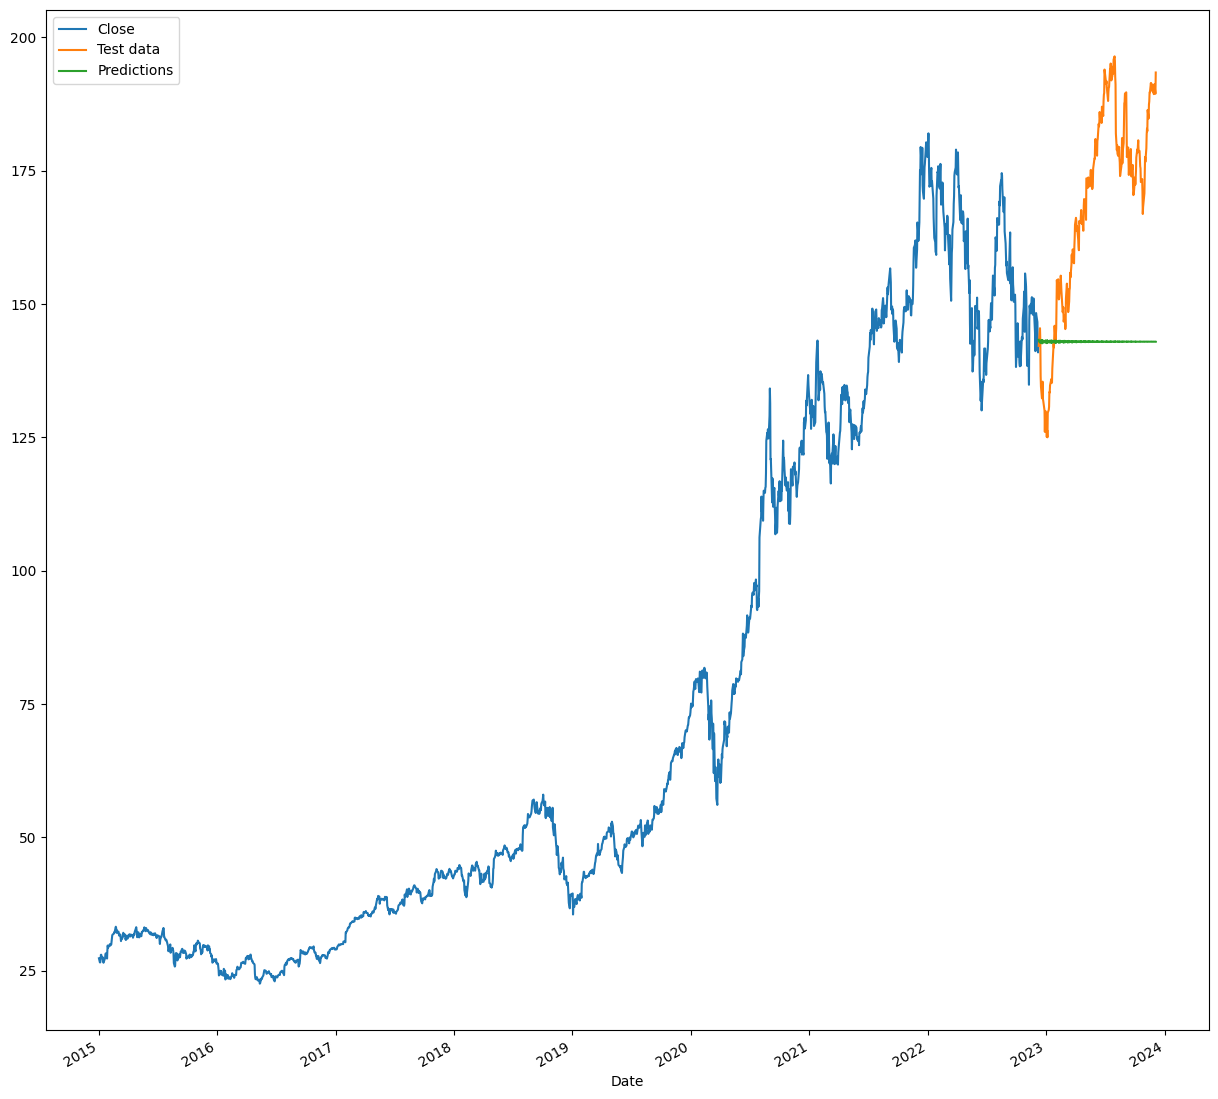

In [ ]:
train.plot(label='Training data')
test['Close'].plot(label='Test data')
fc.plot(label='Predictions')
plt.legend()

In [ ]:
model = auto_arima(pd.DataFrame(df), max_p=6, max_q=3, m=5, seasonal=True, max_P=4, max_Q=4, max_D=2, max_order=None,
                   d=None, trace=True, trend='ct',
                   out_of_sample_size = int(len(df)*.2),
                   error_action='ignore',   # we don't want to know if an order does not work
                   suppress_warnings=True,  # we don't want convergence warnings
                   stepwise=True) # set to stepwise
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[5] intercept   : AIC=9384.777, Time=15.28 sec
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=9082.405, Time=1.65 sec
 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=9080.428, Time=9.18 sec
 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=9080.370, Time=4.09 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=9082.405, Time=1.69 sec
 ARIMA(0,1,1)(0,0,0)[5] intercept   : AIC=9081.280, Time=2.95 sec
 ARIMA(0,1,1)(1,0,1)[5] intercept   : AIC=9086.163, Time=7.25 sec
 ARIMA(0,1,1)(0,0,2)[5] intercept   : AIC=9081.326, Time=10.52 sec
 ARIMA(0,1,1)(1,0,0)[5] intercept   : AIC=9080.257, Time=12.29 sec
 ARIMA(0,1,1)(2,0,0)[5] intercept   : AIC=9081.105, Time=11.28 sec
 ARIMA(0,1,1)(2,0,1)[5] intercept   : AIC=9359.860, Time=5.22 sec
 ARIMA(0,1,0)(1,0,0)[5] intercept   : AIC=9081.479, Time=6.75 sec
 ARIMA(1,1,1)(1,0,0)[5] intercept   : AIC=9083.822, Time=14.64 sec
 ARIMA(0,1,2)(1,0,0)[5] intercept   : AIC=9080.666, Time=10.65 sec
 ARIMA(1,1,2)(1,0,0)[5] int

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 2247
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 5)   Log Likelihood               -4535.129
Date:                            Tue, 10 Sep 2024   AIC                           9080.257
Time:                                    18:34:21   BIC                           9108.842
Sample:                                         0   HQIC                          9090.691
                                           - 2247                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0206      0.180     -0.114      0.909      -0.373       0.332
drift       7.555e-05      0.000      0.729      0.466      -0.000       0.000
ma.L1         -0.0408      0.013     -3.218      0.001      -0.066      -0.016
ar.S.L5        0.0354      0.012      2.876      0.004       0.011       0.060
sigma2         3.3155      0.049     67.039      0.000       3.219       3.412
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              3685.70
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):              38.56   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model = ARIMA(train, order=(0,1,1), seasonal_order=(1,0,0,5))
model_fit = model.fit()
print(model_fit.summary())

                                    SARIMAX Results                                     
Dep. Variable:                            Close   No. Observations:                 1999
Model:             ARIMA(0, 1, 1)x(1, 0, [], 5)   Log Likelihood               -3969.211
Date:                          Tue, 10 Sep 2024   AIC                           7944.421
Time:                                  18:34:21   BIC                           7961.221
Sample:                                       0   HQIC                          7950.590
                                         - 1999                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0620      0.013     -4.910      0.000      -0.087      -0.037
ar.S.L5        0.0532      0.012      4.369      0.

In [ ]:
fc = pd.Series(model_fit.forecast(len(test)))
fc.index = test.index
fc

,predicted_mean
Date,
2022-12-09,142.528057
2022-12-12,142.465240
2022-12-13,142.267208
2022-12-14,142.162335
2022-12-15,142.253366
...,...
2023-11-29,142.231065
2023-11-30,142.231065
2023-12-01,142.231065


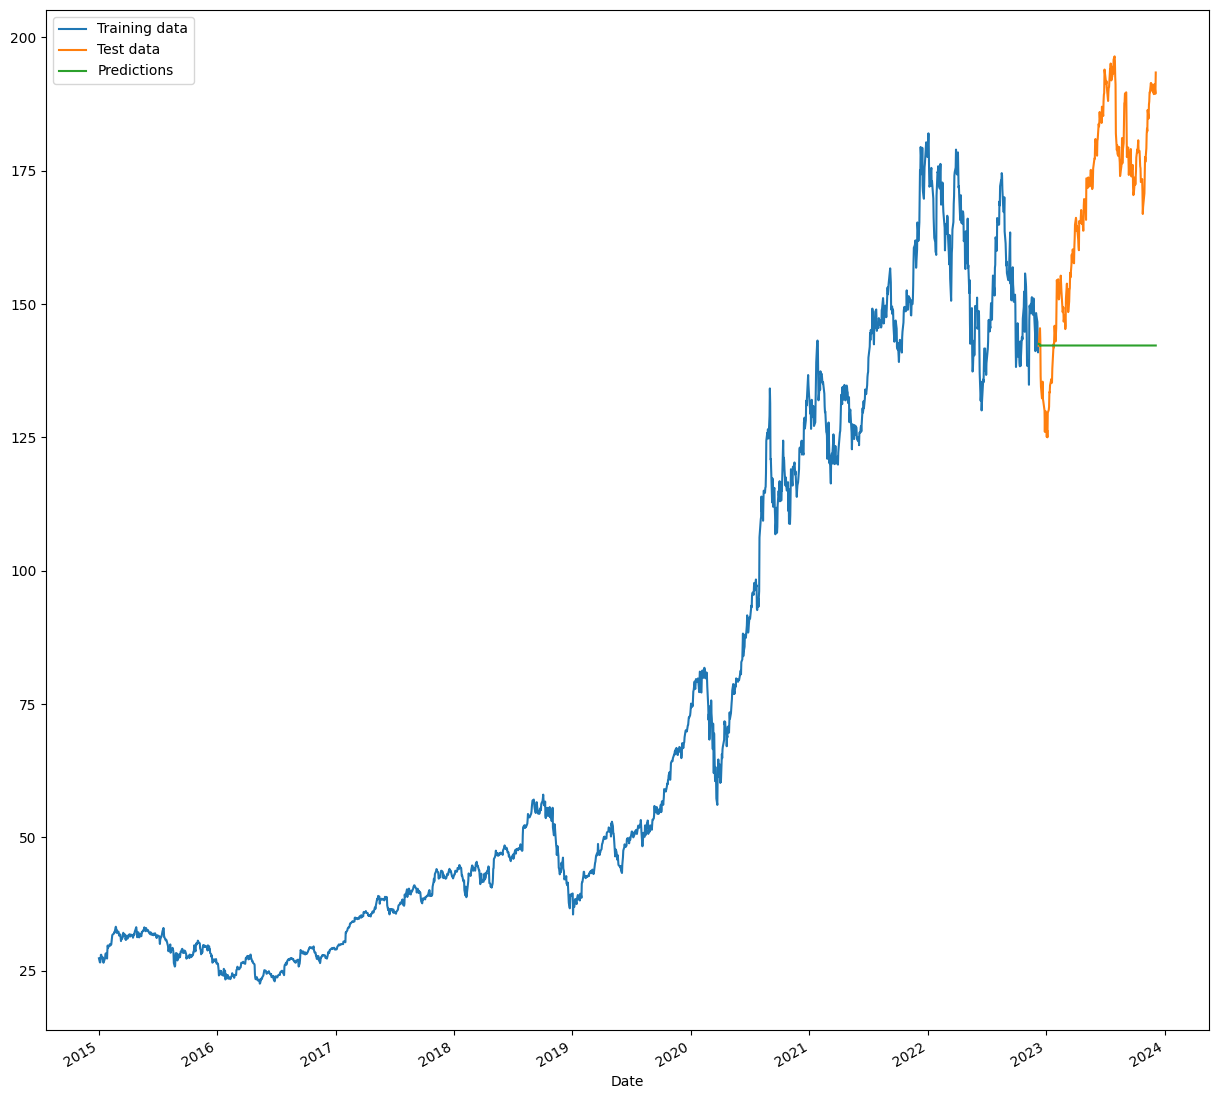

In [ ]:
train['Close'].plot(label='Training data')
test['Close'].plot(label='Test data')
fc.plot(label='Predictions')
plt.legend()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate R² score
r2 = r2_score(test, fc)
mae = mean_absolute_error(test, fc)
rmse = np.sqrt(mean_squared_error(test, fc))
mape = np.mean(np.abs((test['Close'] - fc) / test['Close'])) * 100


# Display the R²
print(f'Mean Absolute Error (MAE): {mae:.3f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.3f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.3f}%')
print(f'R² Score: {r2:.2f}')


Mean Absolute Error (MAE): 28.552
Root Mean Squared Error (RMSE): 32.303
Mean Absolute Percentage Error (MAPE): 16.161%
R² Score: -2.07
